<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 11 - K Means Clustering

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


# Excercise 1: K-Means on Toys Dataset

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

**Tạo data**

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [ ]:
# TODO
# 1. Kiểm tra shape của X và y
# 2. Kiểm tra X và y
# 3. Cho biết dataset trên thuộc về bài toán nào (classification hay regression)
print("Shape of X",X.shape)
print("Shape of y",y.shape)
print(X)
print(np.unique(y,return_counts = True))

Shape of X (2000, 2)
Shape of y (2000,)
[[-2.78161655  3.06930337]
 [ 0.9528098   2.83816802]
 [-1.92550972  1.77175736]
 ...
 [ 0.45543698  1.63539198]
 [-2.93171319  2.87760279]
 [-2.803323    1.77918831]]
(array([0, 1, 2, 3, 4]), array([400, 400, 400, 400, 400]))


**Visualize data**

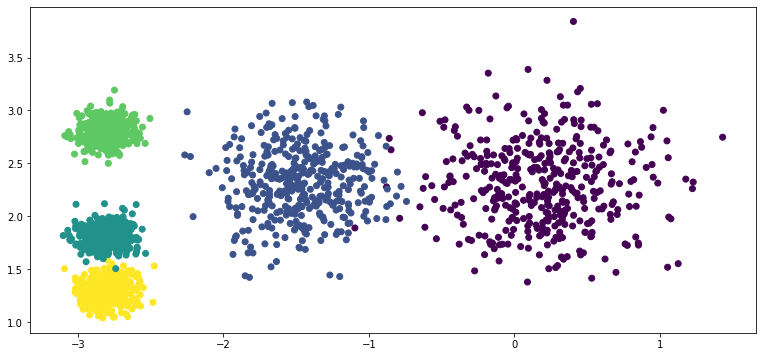

In [ ]:
plt.figure(figsize=(13,6))
plt.scatter(X[:, 0], X[:, 1], c=y)

**Khởi tạo K-Means**

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=42).fit(X)

**Hàm hỗ trợ vẽ Decision Boundary**

In [ ]:
def plot_decision_boundaries(model, X, y, resolution=1000):
  plt.figure(figsize=(16,7))
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plt.scatter(X[:, 0], X[:, 1], c=y, )
  centroids = model.cluster_centers_
  plt.scatter(centroids[:, 0], centroids[:, 1], color='red',
                marker='x', s=80, linewidths=80)
  plt.show()

**Lấy ra tọa độ các centroids**

In [ ]:
model.cluster_centers_

array([[-1.4453407 ,  2.32051326],
       [ 0.20925539,  2.30351618],
       [-2.79244799,  1.2973862 ],
       [-2.79846237,  2.80004584],
       [-2.80372723,  1.80873739]])

**Vẽ decision boundary**

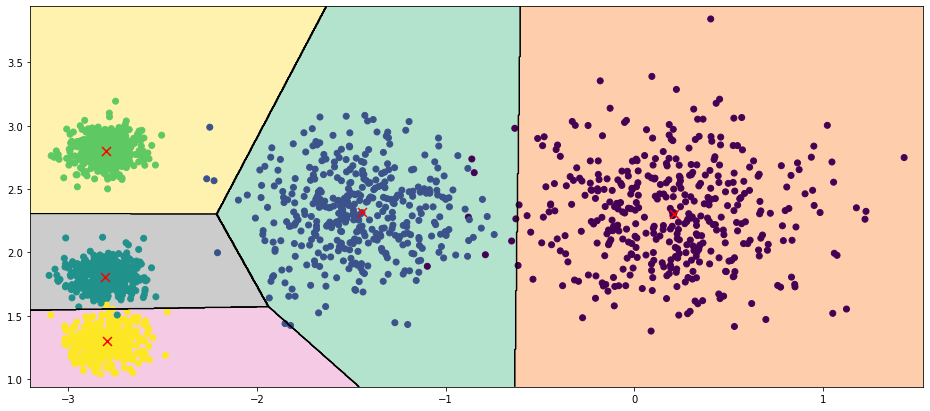

In [ ]:
plot_decision_boundaries(model, X, y)
# Duong trung truc cua 2 trong tam laf duong thang nen no van duoc xxep la linear

**Dự đoán 1 điểm dữ liệu mới**

In [ ]:
X_new = np.array([[-0.9, 3.5], [1,1]])
model.predict(X_new)

array([0, 1], dtype=int32)

**Làm sao đánh giá performance của thuật toán K-Means**

Ta dùng metrics là **Sum of the squared distances between each training instance and its closest centroid** (Tổng bình phương khoảng cách từ các điểm dữ liệu đến centroids gần nó nhất).

Kết quả càng lớn thì thuật toán chạy càng tệ.

In [ ]:
model.inertia_

213.4217713125891

Ta thấy được mối quan hệ giữa **k** và **inertia**, nếu **k** tăng thì **inertia** sẽ giảm và ngược lại. Vậy ở đây ta đặt ra 1 câu hỏi khác, làm sao để chọn số **k** cho hợp lý?

Đầu tiên, ta cần kiểm chứng lại mối quan hệ giữa **k** và **inertia** trước

**Áp dụng lại K-Means với số lượng K khác nhau**

In [ ]:
# TODO
# 1. Try K-Means with different Ks
# 2. Plot decision boundary for each model
model_5 = KMeans(n_clusters=5,random_state=42).fit(X)
model_6 = KMeans(n_clusters=6,random_state=42).fit(X)
plot_decision_boundaries(model_5)
plot_decision_boundaries(model_6)

In [ ]:
print(model_5.inertia_)
print(model_6.inertia_)

213.4217713125891
173.41021888733104


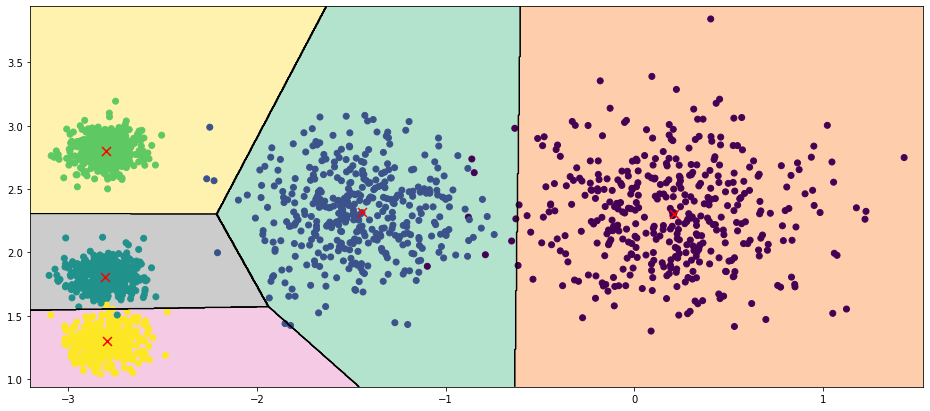

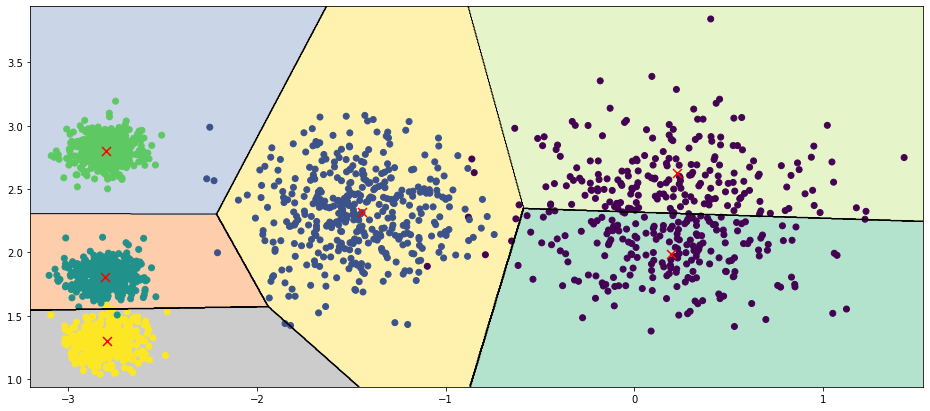

In [ ]:
plot_decision_boundaries(model_5,X,y)
plot_decision_boundaries(model_6,X,y)

**Đồ thị khủy tay (K vs Inertia) (Elbow Curve)**

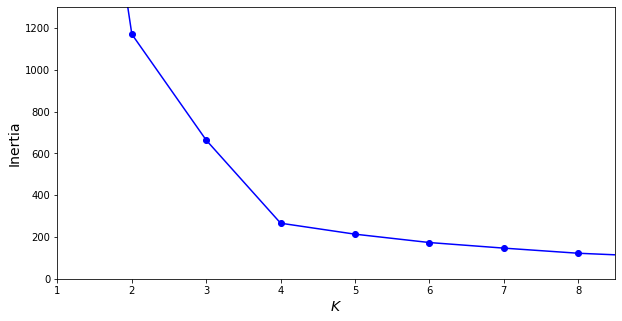

In [ ]:
max_k = 10

model_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max_k)]
inertias = [model.inertia_ for model in model_per_k]

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_k), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
plt.show()

**Silhouttet**

In [ ]:
from sklearn.metrics import silhouette_score

max_k = 10

model_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(2, max_k+1)]
silhouettes = [silhouette_score(X, model.labels_)
                     for model in model_per_k]

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_k+1), silhouettes, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()

**Thử lại K-Means với ``k=4`` và vẽ Decision Boundary**

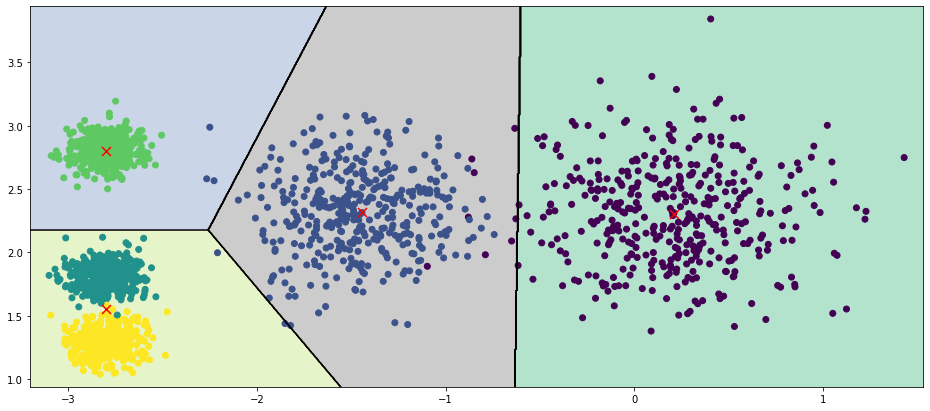

In [ ]:
# TODOs
#Mini batch Kmeans
model_4 = KMeans(n_clusters=4,random_state=42).fit(X)
plot_decision_boundaries(model_4,X,y)

**Nhược điểm của K-Means**

In [ ]:
def create_data():
  X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
  X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
  X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
  X2 = X2 + [6, -8]
  X = np.r_[X1, X2]
  y = np.r_[y1, y2]
  return X, y

Học viên cần làm các phần sau:
- Visualize dataset bên trên
- Nhìn vào scatter plot được vẽ, thử áp dụng K-Means để phân cụm
- In ra inertia
- Vẽ decision boundary
- Vẽ đồ thị khủy tay để chọn ra K tốt nhất 
- Áp dụng lại K-Means với k tốt nhất, in ra inertia và vẽ lại decision boundary

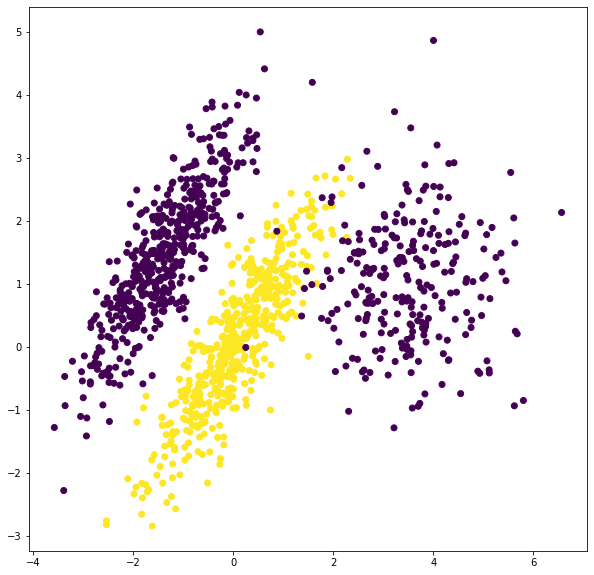

In [ ]:
X1,y1 = create_data()
plt.figure(figsize = (10,10))
plt.scatter(X1[:,0],X1[:,1], c= y1)

3216.8033723406643


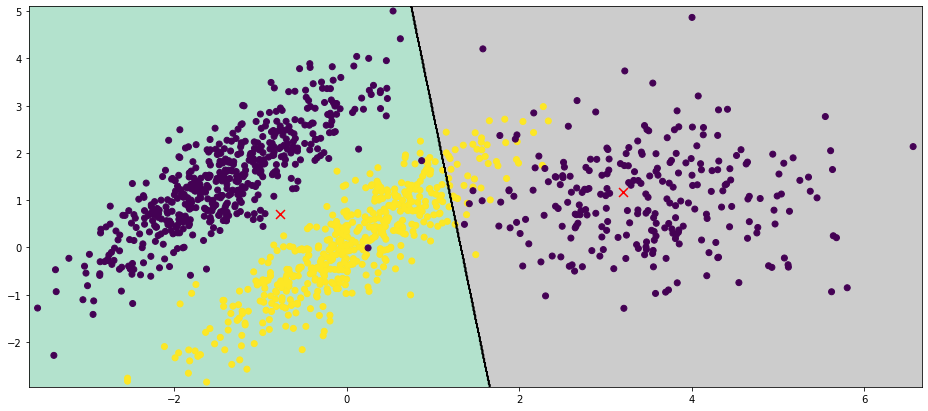

In [ ]:
model_b = KMeans(n_clusters = 2, random_state = 42).fit(X1)
print(model_b.inertia_)
plot_decision_boundaries(model_b,X1,y1)

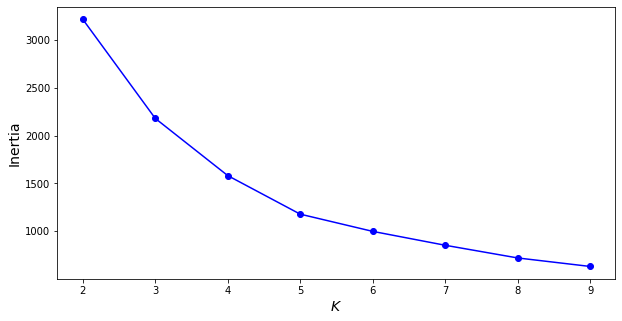

In [ ]:
max_k = 10

model_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1)
                for k in range(2, max_k)]
inertias = [model_b.inertia_ for model_b in model_per_k]

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_k), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.axis([1, 8.5, 0, 1300])
plt.show()

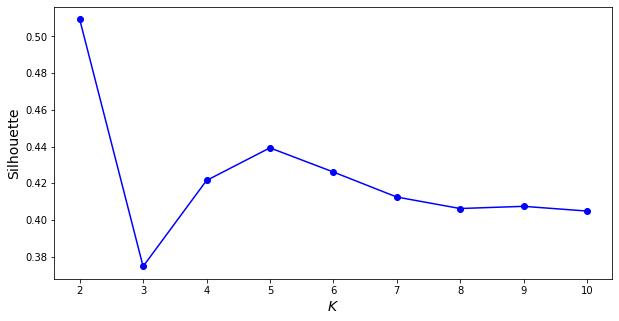

In [ ]:
from sklearn.metrics import silhouette_score

max_k = 10

model_per_k = [KMeans(n_clusters=k, random_state=42).fit(X1)
                for k in range(2, max_k+1)]
silhouettes = [silhouette_score(X1, model_b.labels_)
                     for model_b in model_per_k]

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_k+1), silhouettes, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette", fontsize=14)
plt.show()